In [97]:
import pandas as pd
df = pd.read_csv(r"C:\Users\NEHA1\Documents\IPL Final DataSet.csv")
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Sunrisers Hyderabad,0,Abhishek Sharma,Mitchell Starc,Travis Head,0,0,0,NaN,NaN,[]
1,Sunrisers Hyderabad,0,Abhishek Sharma,Mitchell Starc,Travis Head,0,0,0,NaN,NaN,[]
2,Sunrisers Hyderabad,0,Abhishek Sharma,Mitchell Starc,Travis Head,0,0,0,NaN,NaN,[]
3,Sunrisers Hyderabad,0,Abhishek Sharma,Mitchell Starc,Travis Head,2,0,2,NaN,NaN,[]
4,Sunrisers Hyderabad,0,Abhishek Sharma,Mitchell Starc,Travis Head,0,0,0,Abhishek Sharma,bowled,[]


C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

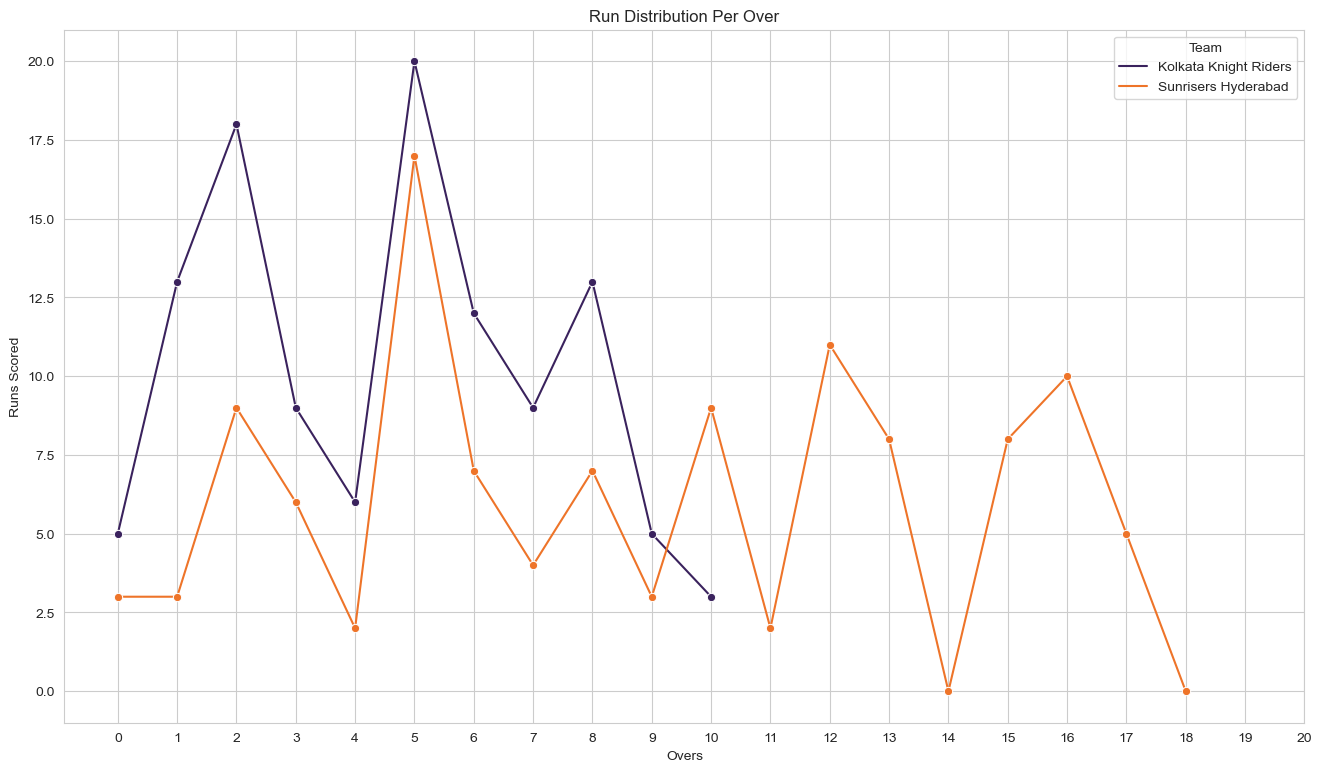

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

# plotting run distribution per over for both teams
plt.figure(figsize=(16, 9))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', palette=['#3A225D', '#EE7429'], marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Overs')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21)) 
plt.legend(title='Team')
plt.show()

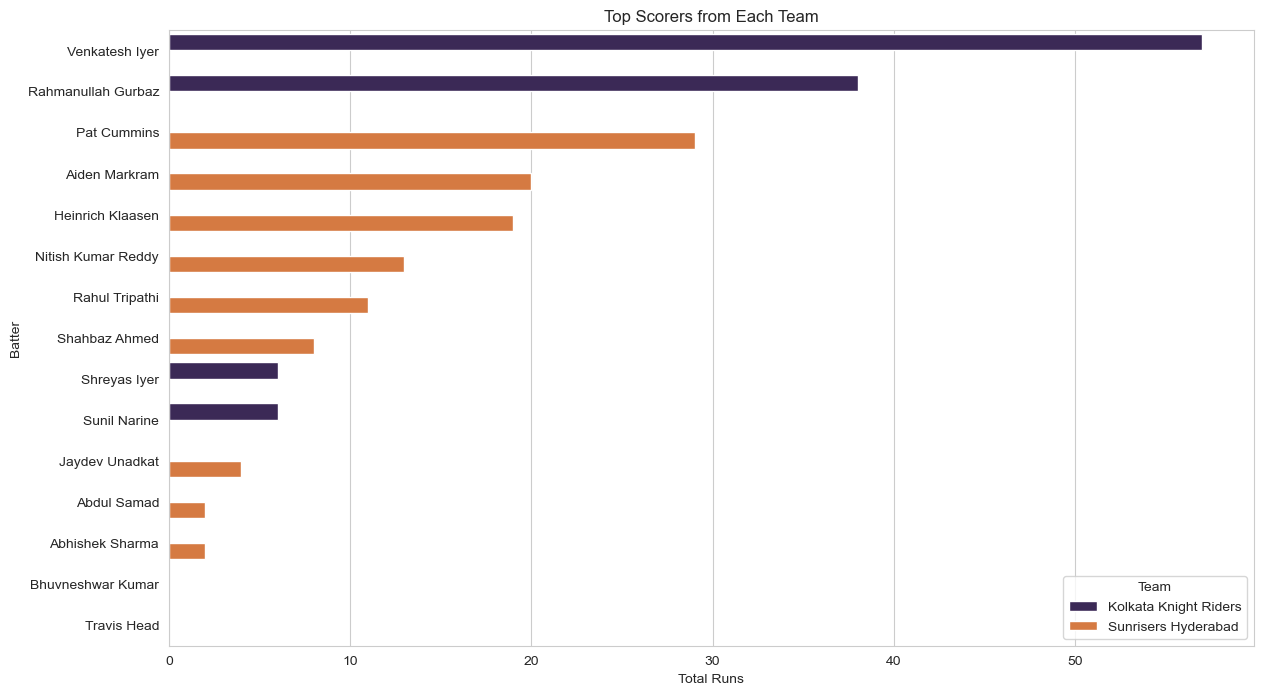

In [99]:
# top scorers from both teams
top_scorers = df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)
# ploting top scorers 
plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team',palette=['#3A225D', '#EE7429'])
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='lower right')
plt.show()

C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


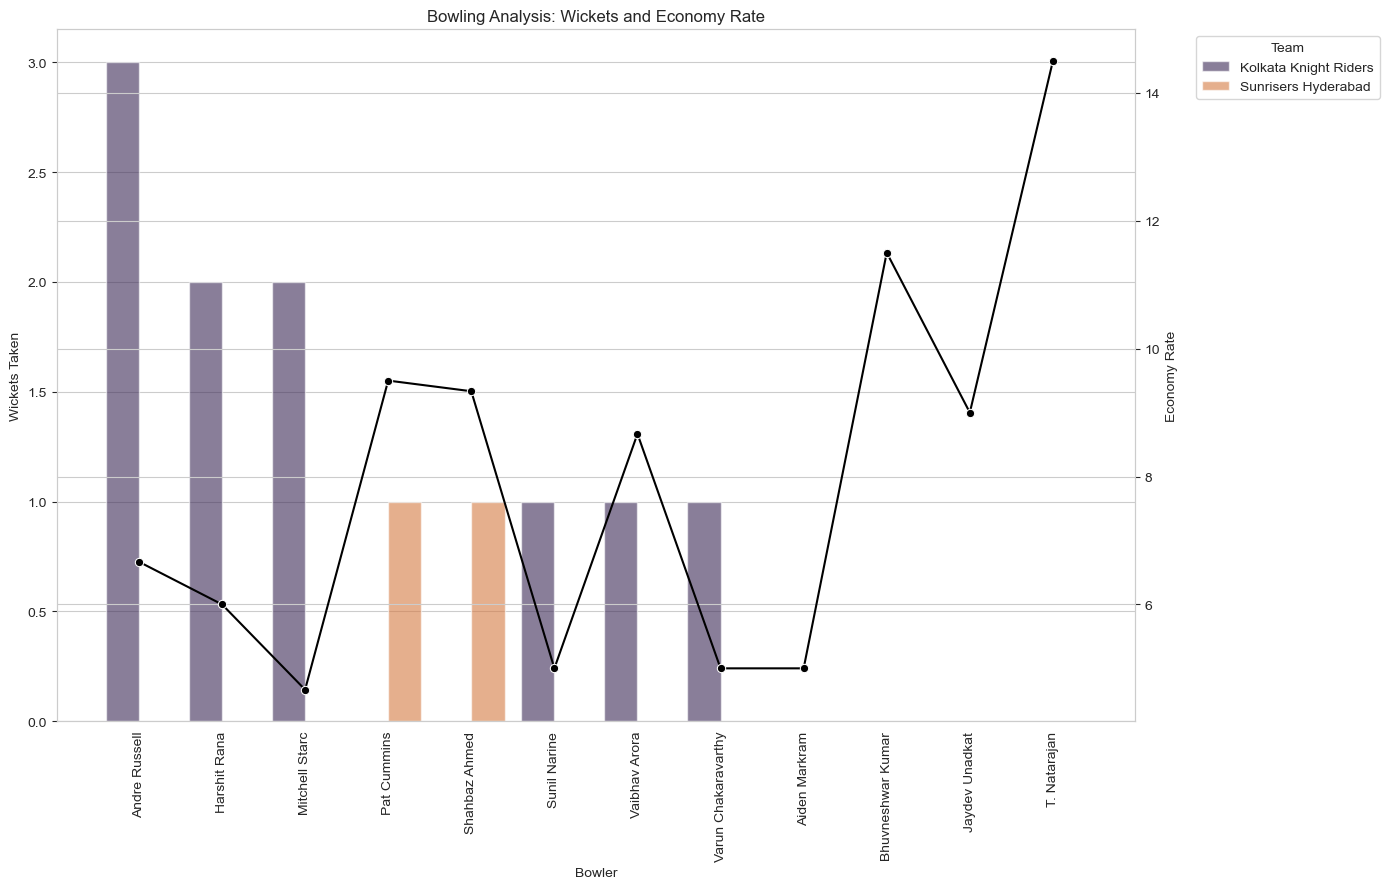

In [100]:

# preparing the DataFrame for bowling analysis
df['wickets_taken'] =df['wicket_kind'].notna().astype(int)
bowling_stats =df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['team'] = bowling_stats.team.replace({'Kolkata Knight Riders': 'Sunrisers Hyderabad', 'Sunrisers Hyderabad': 'Kolkata Knight Riders'})
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

fig, ax1 = plt.subplots(figsize=(14, 9))


# Bar plot for wickets taken by bowlers
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team',palette=['#3A225D','#EE7429'], ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(90)
    
# line plot for economy rate
ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

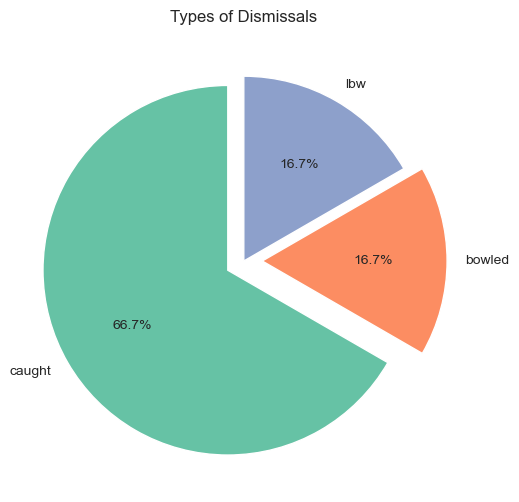

In [110]:
# counting dismissal types
dismissal_types = df['wicket_kind'].dropna().value_counts()
e  =(0.1, 0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(dismissal_types, labels=dismissal_types.index, explode = e, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

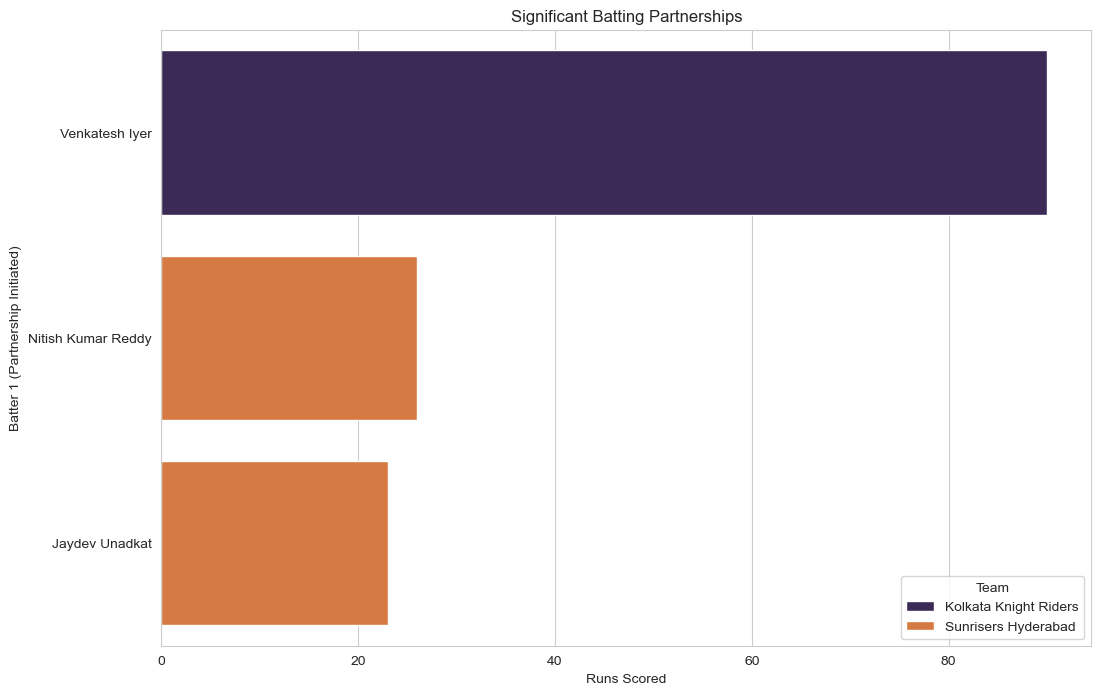

In [130]:

def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    for i, row in df.iterrows():
        if i == 0 or (row['batter'] not in current_partnership.values()):
            if current_partnership:
                partnerships.append(current_partnership)
            current_partnership = {
                'team': row['team'],
                'batter1': row['batter'],
                'batter2': row['non_striker'],
                'runs': 0,
                'balls': 0
            }
        current_partnership['runs'] += row['runs_total']
        current_partnership['balls'] += 1
        if 'player_out' in row and pd.notna(row['player_out']):
            if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
                partnerships.append(current_partnership)
                current_partnership = {}
    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships which is more than 20 runs
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sorting by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team',palette=['#3A225D','#EE7429'], dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\NEHA1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

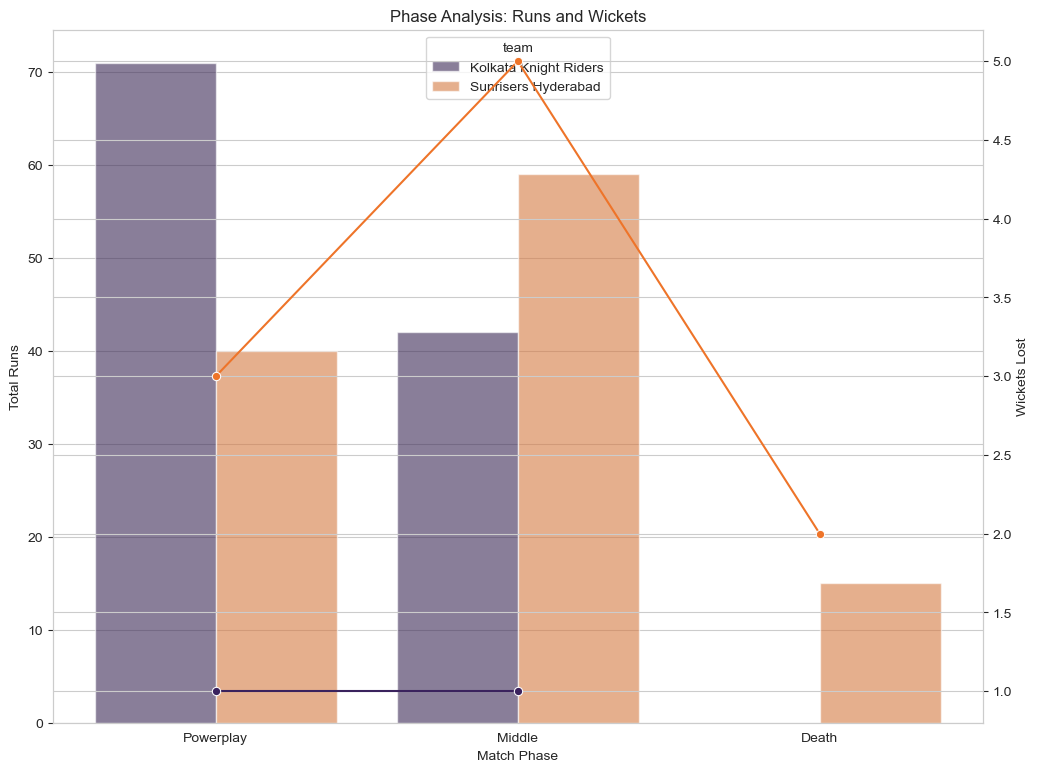

In [133]:

def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

#creating new column in df
df['phase'] = df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

#sorting
phase_analysis = phase_analysis.sort_values(by=['team', 'phase'], ascending=[True, False])

# plotting
fig, ax1 = plt.subplots(figsize=(12, 9))

# bar plot for runs
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team',palette=['#3A225D','#EE7429'], ax=ax1, alpha = 0.6)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets 
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team',palette=['#3A225D','#EE7429'], marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [134]:
# calculate runs and balls faced for each batter
batter_stats = df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
12,Sunil Narine,6,2,300.000000
14,Venkatesh Iyer,57,27,211.111111
11,Shreyas Iyer,6,3,200.000000
7,Pat Cummins,29,20,145.000000
6,Nitish Kumar Reddy,13,10,130.000000
10,Shahbaz Ahmed,8,7,114.285714
8,Rahmanullah Gurbaz,38,35,108.571429
4,Heinrich Klaasen,19,18,105.555556
2,Aiden Markram,20,25,80.000000
9,Rahul Tripathi,11,15,73.333333


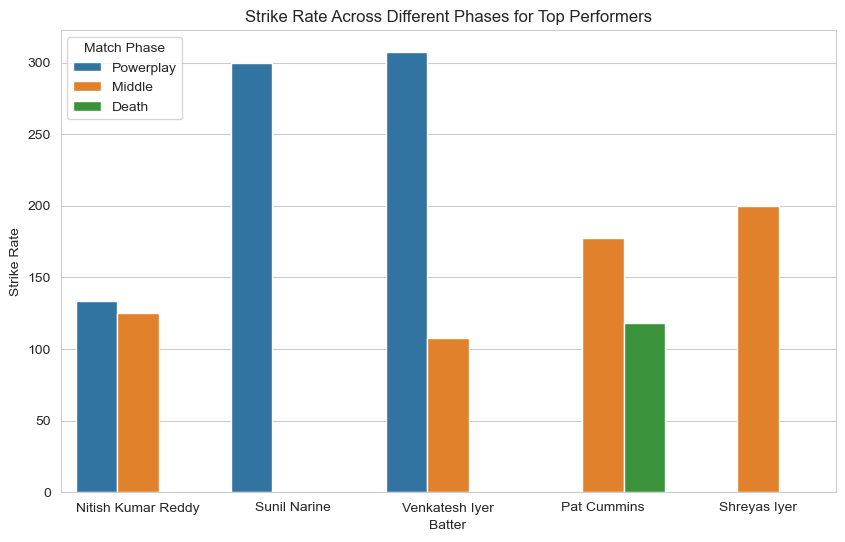

In [135]:
# merging phase information with batter stats
batter_phase_stats = df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

#sorting
batter_phase_stats_top = batter_phase_stats_top.sort_values(by='phase', ascending=False)

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

C:\Users\NEHA1\AppData\Local\Temp\ipykernel_17356\933301820.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  srh_deliveries['over_ball'] = srh_deliveries['over'] + (srh_deliveries.groupby('over').cumcount() + 1) / 6
C:\Users\NEHA1\AppData\Local\Temp\ipykernel_17356\933301820.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kkr_deliveries['over_ball'] = kkr_deliveries['over'] + (kkr_deliveries.groupby('over').cumcount() + 1) / 6


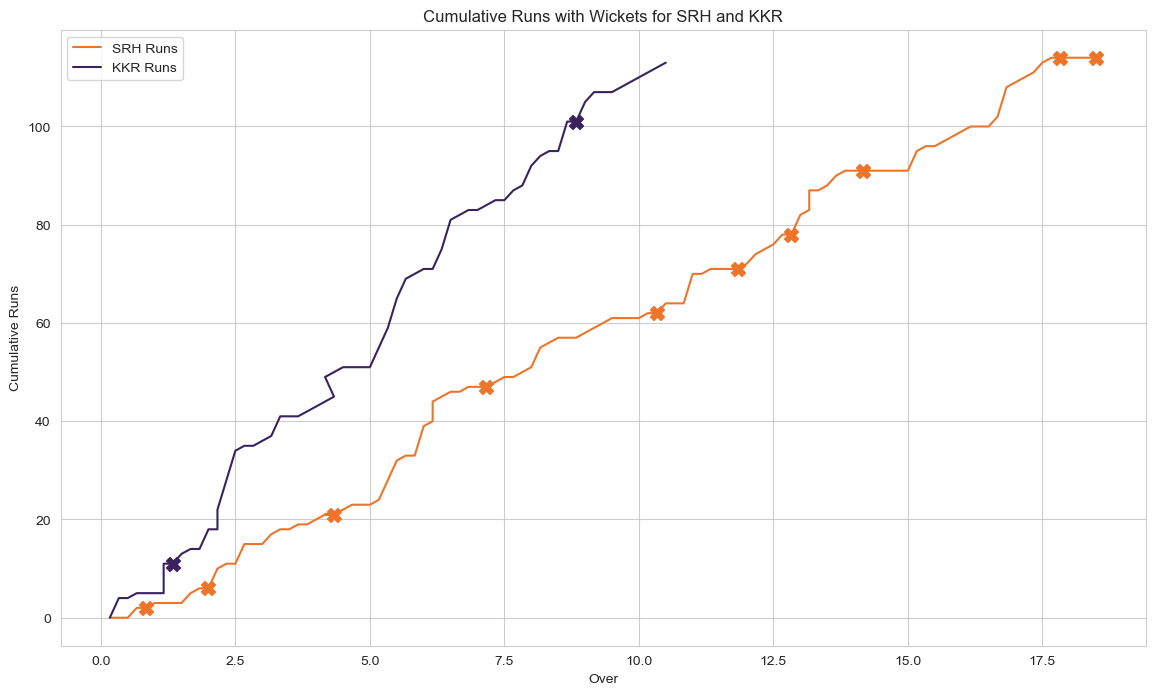

In [137]:
# calculate cumulative runs and wickets for each ball for both teams
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] = df.groupby('team')['wickets_taken'].cumsum()

# separate data for both teams
srh_deliveries = df[df['team'] == 'Sunrisers Hyderabad']
kkr_deliveries = df[df['team'] == 'Kolkata Knight Riders']

# calculating overs for cumulative analysis
srh_deliveries['over_ball'] = srh_deliveries['over'] + (srh_deliveries.groupby('over').cumcount() + 1) / 6
kkr_deliveries['over_ball'] = kkr_deliveries['over'] + (kkr_deliveries.groupby('over').cumcount() + 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for SRH
ax.plot(srh_deliveries['over_ball'], srh_deliveries['cumulative_runs'], color='#EE7429', label='SRH Runs')
ax.scatter(srh_deliveries[srh_deliveries['wickets_taken'] == 1]['over_ball'],
           srh_deliveries[srh_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='#EE7429', marker='X', s=100)

# plot for KKR
ax.plot(kkr_deliveries['over_ball'], kkr_deliveries['cumulative_runs'], color='#3A225D', label='KKR Runs')
ax.scatter(kkr_deliveries[kkr_deliveries['wickets_taken'] == 1]['over_ball'],
           kkr_deliveries[kkr_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='#3A225D', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for SRH and KKR')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

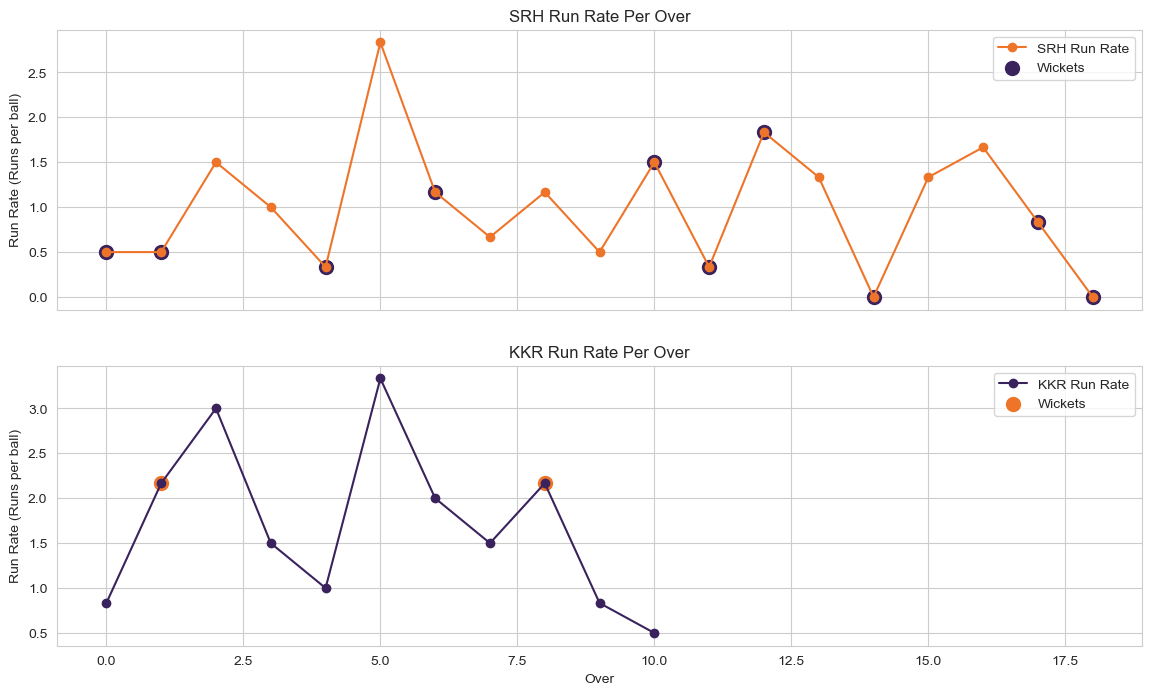

In [141]:
# calculate runs and wickets per over for both teams
per_over_stats = df.groupby(['team', 'over']).agg({'runs_total': 'sum', 'wickets_taken': 'sum'}).reset_index()

# calculate run rate for each over
per_over_stats['run_rate'] = (per_over_stats['runs_total'] / 6)  

# separate data for SRH and KKR for plotting
srh_per_over_stats = per_over_stats[per_over_stats['team'] == 'Sunrisers Hyderabad']
kkr_per_over_stats = per_over_stats[per_over_stats['team'] == 'Kolkata Knight Riders']

# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# SRH
ax1.plot(srh_per_over_stats['over'], srh_per_over_stats['run_rate'],
         marker='o', color='#EE7429', label='SRH Run Rate')
ax1.scatter(srh_per_over_stats[srh_per_over_stats['wickets_taken'] > 0]['over'],
            srh_per_over_stats[srh_per_over_stats['wickets_taken'] > 0]['run_rate'], color='#3A225D', s=100, label='Wickets')
ax1.set_title('SRH Run Rate Per Over')
ax1.set_ylabel('Run Rate (Runs per ball)')
ax1.legend()

# KKR
ax2.plot(kkr_per_over_stats['over'], kkr_per_over_stats['run_rate'],
         marker='o', color='#3A225D', label='KKR Run Rate')
ax2.scatter(kkr_per_over_stats[kkr_per_over_stats['wickets_taken'] > 0]['over'],
            kkr_per_over_stats[kkr_per_over_stats['wickets_taken'] > 0]['run_rate'], color='#EE7429', s=100, label='Wickets')
ax2.set_title('KKR Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Run Rate (Runs per ball)')
ax2.legend()

plt.show()